In [16]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

def rotation2D(theta, x):
    """ x: 2D array"""
    import math
    R = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
    return R @ x

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

    

Text(0.5, 1.0, 'XOR data')

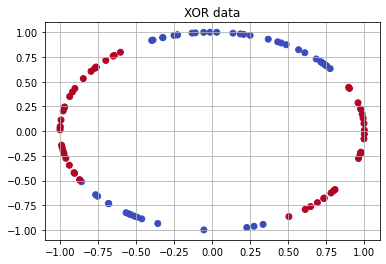

In [17]:
# XOR data
num_data = 100
num_test = 100
XOR_X = 2*np.random.rand(num_data, 2)-1
XOR_X = np.array([x/np.linalg.norm(x) for x in XOR_X])
XOR_rot_y = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_X.T).T])
XOR_Xtest = 2*np.random.rand(num_test, 2)-1
XOR_rot_ytest = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_Xtest.T).T])
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.grid()
plt.title('XOR data')

In [18]:
C = 1e1
X = XOR_X
y = XOR_rot_y
Y = np.array([y]).T
Q = matrix(Y @ Y.T * np.abs(X @ X.T)**2)
p = matrix(-np.ones(y.size))
G = matrix(np.vstack([-np.identity(y.size), np.identity(y.size)]))

h = matrix(np.hstack([np.zeros(y.shape), C*np.ones(y.shape)]))

sol = solvers.qp(Q, p, G, h)

pcost       dcost       gap    pres   dres
 0:  5.5378e+01 -3.7100e+03  7e+03  3e-01  5e-15
 1:  1.2049e+02 -4.8965e+02  7e+02  2e-02  4e-15
 2:  7.6276e-01 -1.2547e+02  1e+02  2e-03  3e-15
 3: -2.5794e+01 -8.5611e+01  6e+01  7e-04  3e-15
 4: -3.9024e+01 -6.6810e+01  3e+01  3e-04  3e-15
 5: -4.5082e+01 -5.8536e+01  1e+01  8e-05  3e-15
 6: -4.7639e+01 -5.7198e+01  1e+01  3e-05  3e-15
 7: -5.0466e+01 -5.4622e+01  4e+00  7e-06  3e-15
 8: -5.1730e+01 -5.2572e+01  8e-01  4e-07  4e-15
 9: -5.2105e+01 -5.2148e+01  4e-02  1e-09  3e-15
10: -5.2125e+01 -5.2127e+01  1e-03  9e-12  3e-15
11: -5.2126e+01 -5.2126e+01  1e-05  9e-14  4e-15
Optimal solution found.


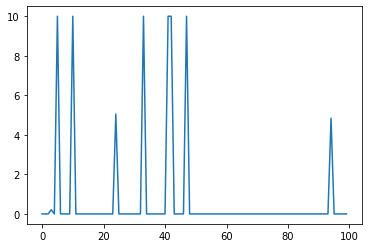

In [19]:
plt.plot(sol['x'])

Text(0.5, 1.0, 'XOR data')

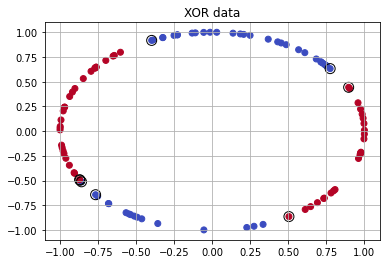

In [20]:
svi = (np.array(sol['x'])>=np.mean(np.array(sol['x']), axis=0)).reshape(-1)
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.scatter(XOR_X[svi,0], XOR_X[svi,1], s=100, linewidth=1.0, facecolors='none', edgecolors='k')
plt.grid()
plt.title('XOR data')

In [21]:
np.ravel(sol['x'])

array([2.37795717e-08, 1.65323036e-08, 3.50767402e-08, 2.11179226e-01,
       1.25285800e-06, 9.99999989e+00, 9.55453961e-08, 1.71958856e-07,
       2.90029915e-08, 1.65258247e-08, 9.99999995e+00, 2.34502601e-08,
       2.49105299e-08, 4.61326111e-08, 1.65238690e-08, 3.28807469e-07,
       4.25936338e-08, 4.09324224e-08, 2.94853894e-08, 3.20897515e-08,
       3.39915441e-08, 2.68600161e-08, 4.09401586e-08, 3.64822506e-07,
       5.04907567e+00, 2.13666237e-08, 2.80401914e-08, 2.02436329e-08,
       2.08246133e-08, 3.33134328e-07, 2.26682235e-07, 3.24529119e-08,
       1.82640934e-08, 9.99999944e+00, 4.08336650e-08, 2.62045995e-08,
       1.91901687e-08, 5.79759397e-08, 1.75101151e-08, 3.23307850e-08,
       1.30502608e-07, 9.99999183e+00, 9.99999996e+00, 2.78579532e-08,
       1.17291306e-07, 1.41304791e-07, 1.89973431e-08, 9.99999987e+00,
       8.33879371e-08, 1.65460278e-08, 4.20567852e-08, 1.78881020e-08,
       9.09013708e-08, 9.47743079e-08, 2.84369699e-08, 2.65591696e-08,
      

In [37]:
from classification.classifier import SVM
from classification.optimizer import CVXOPT
linker = lambda X, Y: X@Y.T
cls = SVM(XOR_X, XOR_rot_y, kernel= 'power2')
cls.optimize(CVXOPT, C=1)

pcost       dcost       gap    pres   dres
 0: -1.6447e+01 -1.5192e+02  6e+02  2e+00  9e-16
 1: -9.2230e+00 -7.3044e+01  8e+01  7e-02  7e-16
 2: -1.1283e+01 -2.1257e+01  1e+01  9e-03  9e-16
 3: -1.4014e+01 -1.6354e+01  2e+00  2e-03  6e-16
 4: -1.4694e+01 -1.5378e+01  7e-01  3e-04  6e-16
 5: -1.4908e+01 -1.5084e+01  2e-01  7e-05  6e-16
 6: -1.4952e+01 -1.5016e+01  6e-02  2e-05  6e-16
 7: -1.4979e+01 -1.4983e+01  4e-03  9e-07  7e-16
 8: -1.4981e+01 -1.4981e+01  6e-05  1e-08  7e-16
 9: -1.4981e+01 -1.4981e+01  6e-07  1e-10  7e-16
Optimal solution found.


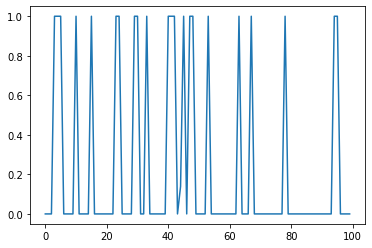

In [38]:
sol = cls.opt_dict
plt.plot(sol['x'])

Text(0.5, 1.0, 'XOR data')

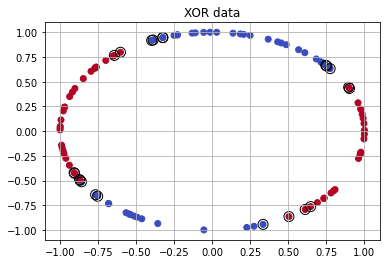

In [39]:
svi = cls.support_vector_index
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.scatter(XOR_X[svi,0], XOR_X[svi,1], s=100, linewidth=1.0, facecolors='none', edgecolors='k')
plt.grid()
plt.title('XOR data')

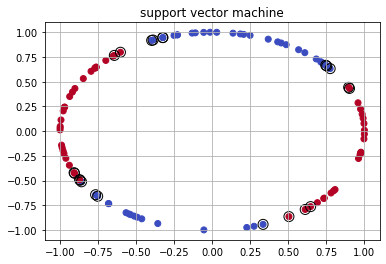

In [40]:
cls.plot()

In [41]:
cls.classify(X)==XOR_rot_y

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [42]:
cls.check_perfomance(XOR_Xtest, XOR_rot_ytest)

1.0

In [28]:
A=int(np.ceil(np.log2(3)))